In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

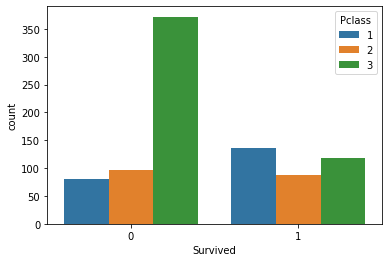

In [3]:
sns.countplot(x="Survived", data=train_data, hue="Pclass")

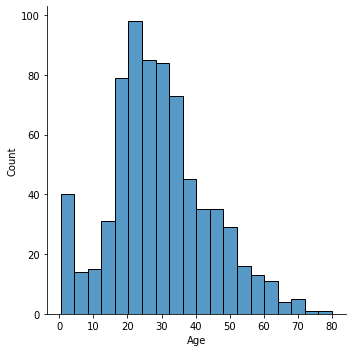

In [4]:
sns.displot(train_data["Age"])

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

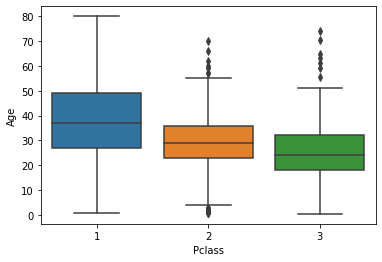

In [7]:
sns.boxplot(x="Pclass", y="Age", data=train_data)

In [8]:
print(train_data[train_data["Pclass"] == 1]["Age"].mean())
print(train_data[train_data["Pclass"] == 2]["Age"].mean())
print(train_data[train_data["Pclass"] == 3]["Age"].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [9]:
def fill_in_na_values(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return round(train_data[train_data["Pclass"] == 1]["Age"].mean())
        elif pclass == 2:
            return round(train_data[train_data["Pclass"] == 2]["Age"].mean())
        elif pclass == 3:
            return round(train_data[train_data["Pclass"] == 3]["Age"].mean())
    else:
        return age
    
train_data["Age"] = train_data[["Age", "Pclass"]].apply(fill_in_na_values, axis=1)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

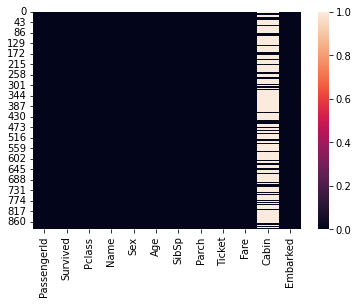

In [10]:
sns.heatmap(train_data.isnull())

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_data.drop(["Cabin"], axis=1, inplace=True)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
train_data.dropna(inplace=True)

In [15]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
train_data.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [17]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [19]:
sex = pd.get_dummies(train_data["Sex"], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [20]:
embarked = pd.get_dummies(train_data["Embarked"], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [21]:
train_data.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [22]:
train_data = pd.concat([train_data, sex, embarked], axis=1)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X =  train_data.drop("Survived", axis=1)
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train
y_test

361    0
612    1
327    1
334    1
662    0
      ..
267    1
22     1
366    1
708    1
624    0
Name: Survived, Length: 178, dtype: int64

In [26]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       112
           1       0.85      0.62      0.72        66

    accuracy                           0.82       178
   macro avg       0.83      0.78      0.79       178
weighted avg       0.82      0.82      0.81       178

[[105   7]
 [ 25  41]]


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.1,1,10,50,100,1000], "gamma":[1,0.1,0.001,0.0001,0.00001,0.000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1

[CV] END ..................................C=50, gamma=0.001; total time=   0.0s
[CV] END ..................................C=50, gamma=0.001; total time=   0.0s
[CV] END ..................................C=50, gamma=0.001; total time=   0.0s
[CV] END ..................................C=50, gamma=0.001; total time=   0.0s
[CV] END .................................C=50, gamma=0.0001; total time=   0.0s
[CV] END .................................C=50, gamma=0.0001; total time=   0.0s
[CV] END .................................C=50, gamma=0.0001; total time=   0.0s
[CV] END .................................C=50, gamma=0.0001; total time=   0.0s
[CV] END .................................C=50, gamma=0.0001; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ..................................C=50, gamma=1e-05; total time=   0.0s
[CV] END ...................

In [29]:
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       112
           1       0.84      0.65      0.74        66

    accuracy                           0.83       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.83      0.83      0.82       178

[[104   8]
 [ 23  43]]


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.78      0.71      0.75        66

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178

[[99 13]
 [19 47]]


## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

error_list = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    error_list.append(np.mean(knn_predictions != y_test))

error_list

[0.24157303370786518,
 0.21348314606741572,
 0.17415730337078653,
 0.21348314606741572,
 0.20224719101123595,
 0.19662921348314608,
 0.19662921348314608,
 0.20786516853932585,
 0.20786516853932585,
 0.20786516853932585,
 0.20786516853932585,
 0.21348314606741572,
 0.19662921348314608,
 0.21910112359550563,
 0.19662921348314608,
 0.19101123595505617,
 0.19662921348314608,
 0.1853932584269663,
 0.19101123595505617,
 0.19101123595505617,
 0.19101123595505617,
 0.1797752808988764,
 0.1797752808988764,
 0.17415730337078653,
 0.16853932584269662,
 0.17415730337078653,
 0.1797752808988764,
 0.1853932584269663,
 0.19101123595505617,
 0.1853932584269663,
 0.1853932584269663,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1797752808988764,
 0.1853932584269663,
 0.17415730337078653,
 0.17415730337078653]

24


0.19662921348314608

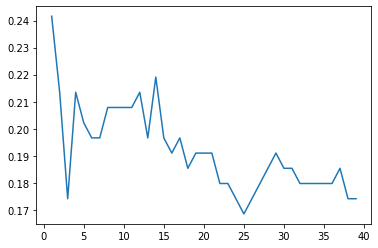

In [32]:
plt.plot(range(1,40), error_list)

print(np.argmin(error_list))
error_list[6]

In [33]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       112
           1       0.86      0.64      0.73        66

    accuracy                           0.83       178
   macro avg       0.84      0.79      0.80       178
weighted avg       0.83      0.83      0.82       178

[[105   7]
 [ 24  42]]


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_test)

print(classification_report(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       112
           1       0.74      0.70      0.72        66

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178

[[96 16]
 [20 46]]


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)

print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       112
           1       0.73      0.67      0.70        66

    accuracy                           0.79       178
   macro avg       0.77      0.76      0.77       178
weighted avg       0.78      0.79      0.78       178

[[96 16]
 [22 44]]


In [36]:
grid_predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [47]:
test_data[["PassengerId"]]
new_y_test = test_data[]

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308
